### Kodu çıktıları ile incelemek için tıklayın :
https://nbviewer.jupyter.org/github/hediyeorhan/DataPreprocessingAnalysisVisualization/blob/main/CovidTurkey.ipynb


###### Kullandığım veri seti linki : https://www.kaggle.com/sefatosun/covid19turkey

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode ,iplot

In [2]:
data = pd.read_csv("covidTurkey.csv")

In [3]:
data.tail()

,Date,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %
142,7/31/2020,982,231347,5691,214535,11121,46492.0,0.088,582.0,0.43,2.12,1929.10,51.18,0.013217
143,8/1/2020,996,232343,5710,215516,11117,44846.0,0.087,586.0,0.44,2.23,1938.62,51.37,0.013213
144,8/2/2020,987,233330,5728,216494,11108,40247.0,0.085,582.0,0.43,2.46,1949.00,51.57,0.013202
145,8/3/2020,995,234325,5747,217497,11081,41301.0,0.084,580.0,0.43,2.41,1962.80,51.87,0.013170
146,8/4/2020,1083,235408,5765,218491,11152,46249.0,0.085,583.0,0.47,2.35,1959.21,51.70,0.013254


In [4]:
data = data.rename(columns = {
    "Date" : "Tarih",
    "Daily Cases" : "GunlukVaka",
    "Total Cases" : "ToplamVaka",
    "Total Deaths" : "ToplamOlum",
    "Total Recovered" : "ToplamIyılesen",
    "Active Cases" : "AktifVaka",
    "Daily Test Cases" : "GunlukTest",
    "Total Intensive Care" : "ToplamAgirVaka",
    "Intubated Cases" : "EntubeHasta",
    "Case incrase rate %" : "VakaArtisOrani",
    "Daily(Cases/Test) %" : "GunlukVakaTestOrani",
    "(Recovered / Active Cases) %" : "IyilesenAktifVakaOrani",
    "(Death / Active Cases) %" : "OlumAktifVakaOrani",
    "(Active Cases / Population) %" : "AktifVakaNufusOrani"
})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tarih                   147 non-null    object 
 1   GunlukVaka              147 non-null    int64  
 2   ToplamVaka              147 non-null    int64  
 3   ToplamOlum              147 non-null    int64  
 4   ToplamIyılesen          147 non-null    int64  
 5   AktifVaka               147 non-null    int64  
 6   GunlukTest              139 non-null    float64
 7   ToplamAgirVaka          131 non-null    object 
 8   EntubeHasta             131 non-null    float64
 9   VakaArtisOrani          147 non-null    float64
 10  GunlukVakaTestOrani     139 non-null    float64
 11  IyilesenAktifVakaOrani  147 non-null    float64
 12  OlumAktifVakaOrani      147 non-null    float64
 13  AktifVakaNufusOrani     147 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory 

In [6]:
data.isnull().sum()

Tarih                      0
GunlukVaka                 0
ToplamVaka                 0
ToplamOlum                 0
ToplamIyılesen             0
AktifVaka                  0
GunlukTest                 8
ToplamAgirVaka            16
EntubeHasta               16
VakaArtisOrani             0
GunlukVakaTestOrani        8
IyilesenAktifVakaOrani     0
OlumAktifVakaOrani         0
AktifVakaNufusOrani        0
dtype: int64

In [7]:
data["GunlukTest"].fillna(data["GunlukTest"].mean(), inplace = True)
data["GunlukVakaTestOrani"].fillna(data["GunlukVaka"] / data["GunlukTest"], inplace = True)
data["ToplamAgirVaka"].fillna(method = "bfill", inplace = True)
data["EntubeHasta"].fillna(method = "bfill", inplace = True)

In [8]:
data.isnull().sum()

Tarih                     0
GunlukVaka                0
ToplamVaka                0
ToplamOlum                0
ToplamIyılesen            0
AktifVaka                 0
GunlukTest                0
ToplamAgirVaka            0
EntubeHasta               0
VakaArtisOrani            0
GunlukVakaTestOrani       0
IyilesenAktifVakaOrani    0
OlumAktifVakaOrani        0
AktifVakaNufusOrani       0
dtype: int64

In [9]:
data.head()

,Tarih,GunlukVaka,ToplamVaka,ToplamOlum,ToplamIyılesen,AktifVaka,GunlukTest,ToplamAgirVaka,EntubeHasta,VakaArtisOrani,GunlukVakaTestOrani,IyilesenAktifVakaOrani,OlumAktifVakaOrani,AktifVakaNufusOrani
0,3/11/2020,1,1,0,0,1,35645.978417,344,241.0,0.0,0.000028,0.0,0.0,0.000001
1,3/12/2020,0,1,0,0,1,35645.978417,344,241.0,0.0,0.000000,0.0,0.0,0.000001
2,3/13/2020,4,5,0,0,5,35645.978417,344,241.0,400.0,0.000112,0.0,0.0,0.000006
3,3/14/2020,1,6,0,0,6,35645.978417,344,241.0,20.0,0.000028,0.0,0.0,0.000007
4,3/15/2020,12,18,0,0,18,35645.978417,344,241.0,200.0,0.000337,0.0,0.0,0.000021


In [10]:
data.shape

(147, 14)

In [15]:
fig = px.scatter(data, x="GunlukTest", y="GunlukVaka",size="GunlukVakaTestOrani", color='AktifVaka', log_x=1,title='GunlukVaka-GunlukTest Iliskisi',width=800, height=400)
fig.show()

In [16]:
data.loc[data.ToplamAgirVaka == '=9.4/100', "ToplamAgirVaka"] = "0.094"
data.loc[data.ToplamAgirVaka == '=9.3/100', "ToplamAgirVaka"] = "0.093"

In [17]:
df = data.copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tarih                   147 non-null    object 
 1   GunlukVaka              147 non-null    int64  
 2   ToplamVaka              147 non-null    int64  
 3   ToplamOlum              147 non-null    int64  
 4   ToplamIyılesen          147 non-null    int64  
 5   AktifVaka               147 non-null    int64  
 6   GunlukTest              147 non-null    float64
 7   ToplamAgirVaka          147 non-null    object 
 8   EntubeHasta             147 non-null    float64
 9   VakaArtisOrani          147 non-null    float64
 10  GunlukVakaTestOrani     147 non-null    float64
 11  IyilesenAktifVakaOrani  147 non-null    float64
 12  OlumAktifVakaOrani      147 non-null    float64
 13  AktifVakaNufusOrani     147 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory 

In [19]:
sirali = np.sort(df.ToplamVaka)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 0.000001
c = (DG+a)/k
print(c)

13078.166666722223


In [20]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.1
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.01)

In [21]:
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [22]:
for i in df.ToplamVaka:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.ToplamVaka == i, "ToplamVaka"] = int(z)

In [23]:
df['ToplamAgirVaka'] = df['ToplamAgirVaka'].astype("float")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tarih                   147 non-null    object 
 1   GunlukVaka              147 non-null    int64  
 2   ToplamVaka              147 non-null    int64  
 3   ToplamOlum              147 non-null    int64  
 4   ToplamIyılesen          147 non-null    int64  
 5   AktifVaka               147 non-null    int64  
 6   GunlukTest              147 non-null    float64
 7   ToplamAgirVaka          147 non-null    float64
 8   EntubeHasta             147 non-null    float64
 9   VakaArtisOrani          147 non-null    float64
 10  GunlukVakaTestOrani     147 non-null    float64
 11  IyilesenAktifVakaOrani  147 non-null    float64
 12  OlumAktifVakaOrani      147 non-null    float64
 13  AktifVakaNufusOrani     147 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory 

In [25]:
sirali = np.sort(df.ToplamAgirVaka)
max_deger = np.max(sirali)
min_deger = np.min(sirali)
DG = max_deger - min_deger
k = math.ceil(np.sqrt(303))
a = 0.000001
c = (DG+a)/k
print(c)

106.77311116666667


In [26]:
s_alt = np.zeros((k, 1), dtype=np.float)
s_ust = np.zeros((k, 1), dtype=np.float)
s_alt[0] = min_deger
s_ust[0] = s_alt[1]-0.1
for i in range(1, k):
    s_alt[i] = (s_alt[i-1] + c)
s_ust[:] = s_alt[:] + (c-0.001)

In [27]:
s_ort = np.zeros((k, 1), dtype=np.float)
for i in range(k):
    s_ort[i] = (s_alt[i] + s_ust[i]) / 2

In [28]:
for i in df.ToplamAgirVaka:
    for j in range(k):
        if((s_alt[j]<i) & (i<s_ust[j])):
            z = s_ort[j]
            df.loc[df.ToplamAgirVaka == i, "ToplamAgirVaka"] = int(z)

In [29]:
fig = px.bar(df, x="ToplamVaka", y="ToplamAgirVaka", color="EntubeHasta", title="ToplamVaka - AgirHasta Iliskisi")
fig.show();

In [30]:
data.head()

,Tarih,GunlukVaka,ToplamVaka,ToplamOlum,ToplamIyılesen,AktifVaka,GunlukTest,ToplamAgirVaka,EntubeHasta,VakaArtisOrani,GunlukVakaTestOrani,IyilesenAktifVakaOrani,OlumAktifVakaOrani,AktifVakaNufusOrani
0,3/11/2020,1,1,0,0,1,35645.978417,344,241.0,0.0,0.000028,0.0,0.0,0.000001
1,3/12/2020,0,1,0,0,1,35645.978417,344,241.0,0.0,0.000000,0.0,0.0,0.000001
2,3/13/2020,4,5,0,0,5,35645.978417,344,241.0,400.0,0.000112,0.0,0.0,0.000006
3,3/14/2020,1,6,0,0,6,35645.978417,344,241.0,20.0,0.000028,0.0,0.0,0.000007
4,3/15/2020,12,18,0,0,18,35645.978417,344,241.0,200.0,0.000337,0.0,0.0,0.000021


C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



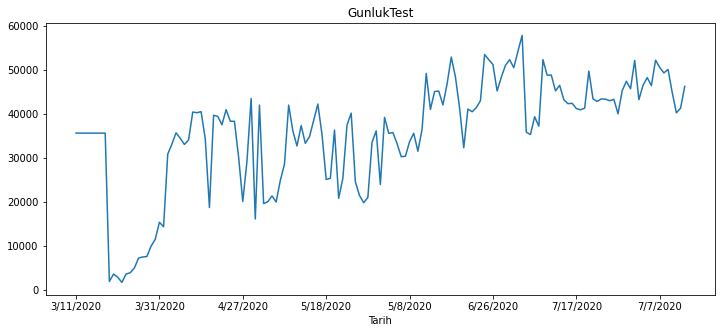

In [31]:
dategroup=data.groupby('Tarih').mean()
plt.figure(figsize=(12,5))
dategroup['GunlukTest'].plot(x=data.Tarih)
plt.title('GunlukTest');

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



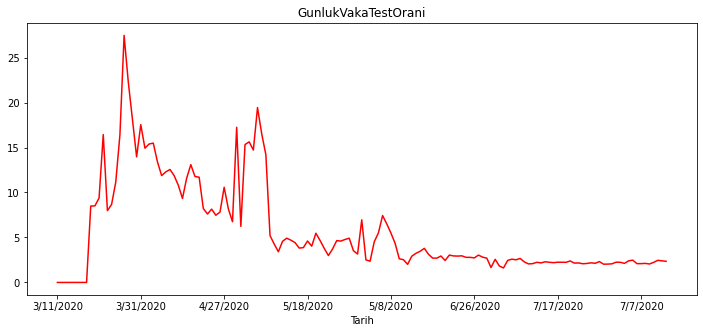

In [32]:
dategroup=data.groupby('Tarih').mean()
plt.figure(figsize=(12,5))
dategroup['GunlukVakaTestOrani'].plot(x=data.Tarih, color = "red")
plt.title('GunlukVakaTestOrani');

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



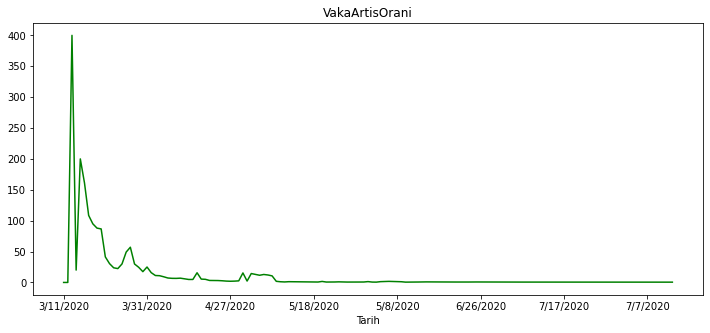

In [33]:
dategroup=data.groupby('Tarih').mean()
plt.figure(figsize=(12,5))
dategroup['VakaArtisOrani'].plot(x=data.Tarih, color = "green")
plt.title('VakaArtisOrani');

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



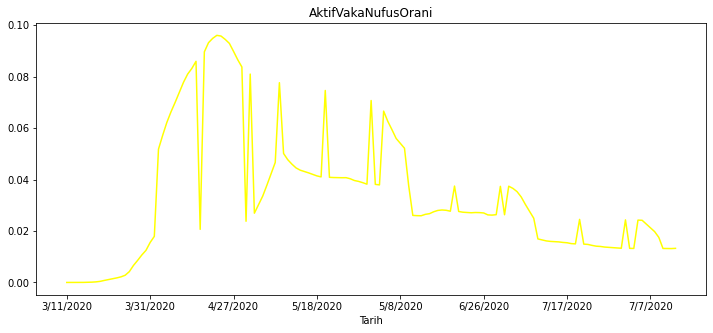

In [34]:
dategroup=data.groupby('Tarih').mean()
plt.figure(figsize=(12,5))
dategroup['AktifVakaNufusOrani'].plot(x=data.Tarih, color = "yellow")
plt.title('AktifVakaNufusOrani');

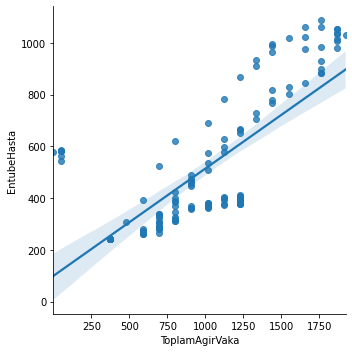

In [35]:
sns.lmplot(x = "ToplamAgirVaka", y = "EntubeHasta", data = df);

In [36]:
data.head()

,Tarih,GunlukVaka,ToplamVaka,ToplamOlum,ToplamIyılesen,AktifVaka,GunlukTest,ToplamAgirVaka,EntubeHasta,VakaArtisOrani,GunlukVakaTestOrani,IyilesenAktifVakaOrani,OlumAktifVakaOrani,AktifVakaNufusOrani
0,3/11/2020,1,1,0,0,1,35645.978417,344,241.0,0.0,0.000028,0.0,0.0,0.000001
1,3/12/2020,0,1,0,0,1,35645.978417,344,241.0,0.0,0.000000,0.0,0.0,0.000001
2,3/13/2020,4,5,0,0,5,35645.978417,344,241.0,400.0,0.000112,0.0,0.0,0.000006
3,3/14/2020,1,6,0,0,6,35645.978417,344,241.0,20.0,0.000028,0.0,0.0,0.000007
4,3/15/2020,12,18,0,0,18,35645.978417,344,241.0,200.0,0.000337,0.0,0.0,0.000021


In [37]:
fig = px.scatter(df, x="IyilesenAktifVakaOrani", y="AktifVaka",size="ToplamAgirVaka", color='EntubeHasta', log_x=1,title='Aktif Vakalar ve Ağır Hasta Durumları')
fig.show()

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



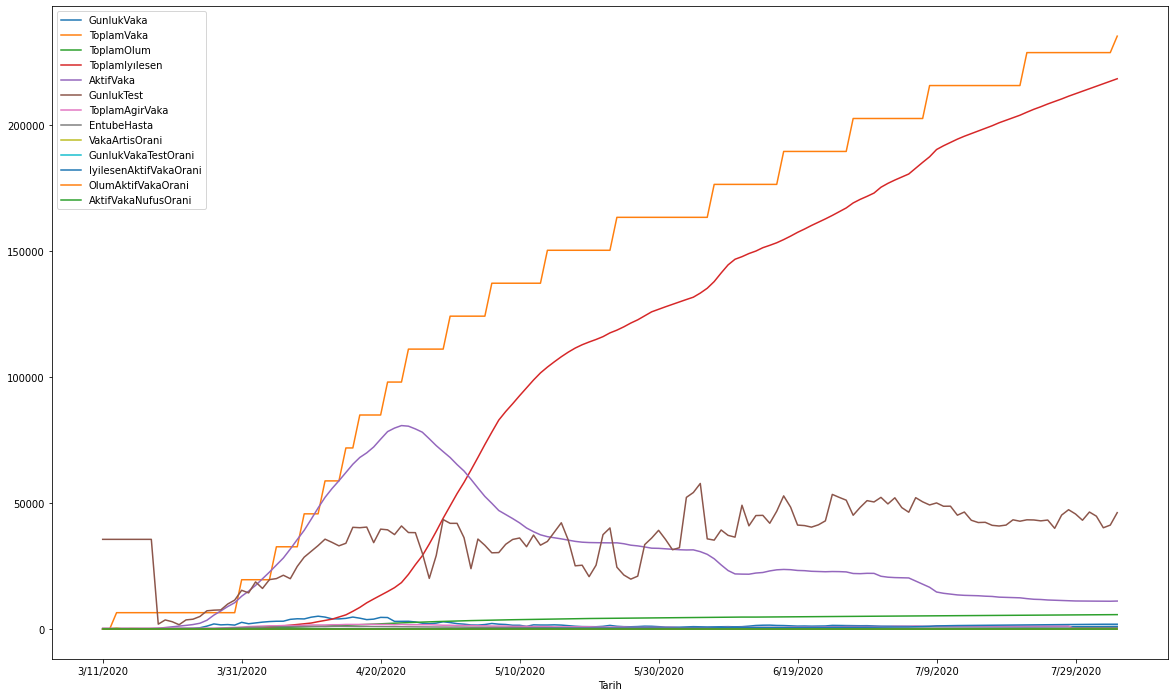

In [38]:
ax = df.set_index('Tarih').plot(figsize=(20, 12))
ax.set_xlabel('Tarih')
plt.show()

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Anaconda3\envs\Python\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



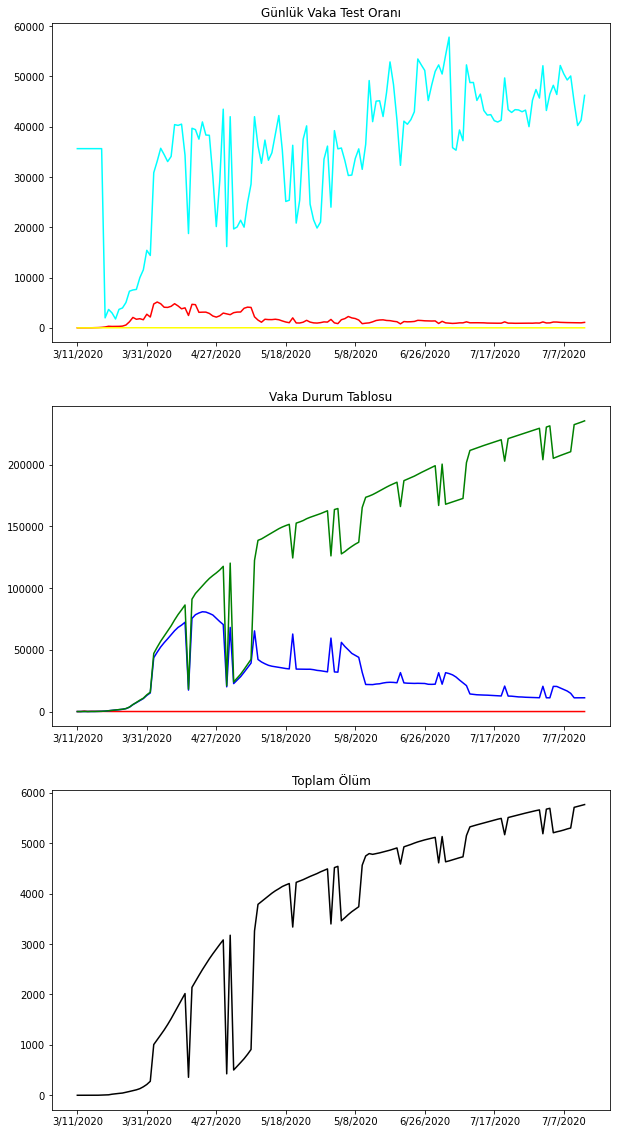

In [39]:
f,ax=plt.subplots(3,1,figsize=(10,20))

dff = data.groupby("Tarih").mean()

dff['GunlukTest'].plot(ax = ax[0], color = 'cyan')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

dff['GunlukVaka'].plot(ax = ax[0], color = 'red')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

dff['GunlukVakaTestOrani'].plot(ax = ax[0], color = 'yellow')
ax[0].set_title('Günlük Vaka Test Oranı')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

dff['VakaArtisOrani'].plot(ax = ax[1], color = 'red')
ax[1].set_title('Ölüm Aktif Vaka Oranı')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

dff['AktifVaka'].plot(ax = ax[1], color = 'blue')
ax[1].set_title('Nüfus Aktif Vaka Oranı')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

dff['ToplamVaka'].plot(ax = ax[1], color = 'green')
ax[1].set_title('Vaka Durum Tablosu')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

dff['ToplamOlum'].plot(ax = ax[2], color = 'black')
ax[2].set_title('Toplam Ölüm')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

f.subplots_adjust(hspace=0.2)
plt.show();